In [125]:
!pip install gdown

In [126]:
!gdown --id 1Wh9jIWUxTIdTTZ87E9IccoFz42NvlhMe

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Wh9jIWUxTIdTTZ87E9IccoFz42NvlhMe
To: /kaggle/working/data.txt
100%|██████████████████████████████████████| 3.88k/3.88k [00:00<00:00, 16.9MB/s]


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns 

# Exploratory Data Analysis

### Load data

In [128]:
file_path = "/kaggle/working/data.txt"
data = pd.read_csv(file_path, header=None)
data.columns = ["Feature 1", "Feature 2", "Target"]

### Display the first few rows of the dataset

In [129]:
data.head()

,Feature 1,Feature 2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Summary statistics

In [130]:
data.describe()

,Feature 1,Feature 2,Target
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Pair plot for visualizing relationships between features

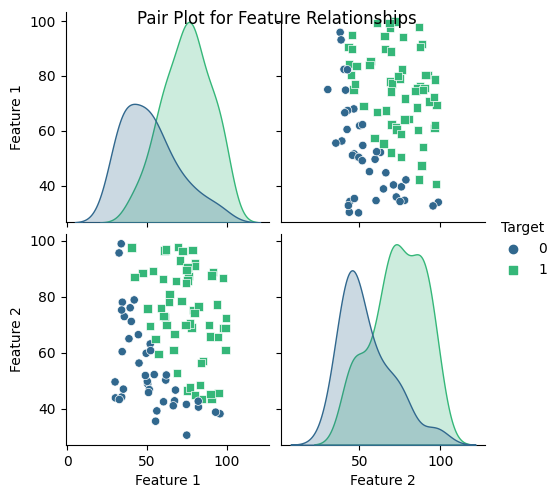

In [131]:
sns.pairplot(data, hue="Target", markers=["o", "s"], palette="viridis")
plt.suptitle("Pair Plot for Feature Relationships")
plt.show()

# Model training

### Separate features and target variable

In [132]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

### Train-test split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build the model

In [134]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    J = -(1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return J.item()

def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (1 / m) * X.T @ (h - y)
    return grad.flatten()

def logistic_regression(X, y):
    X = np.insert(X, 0, values=1, axis=1)
    theta_initial = np.zeros(X.shape[1])

    cost_history = []

    def callback(theta_i):
        cost_i = cost_function(theta_i, X, y)
        cost_history.append(cost_i)

    result = minimize(
        fun=cost_function,
        x0=theta_initial,
        args=(X, y),
        method="TNC",
        jac=None,
        callback=callback
    )

    theta_optimized = result.x
    return theta_optimized, cost_history

### Train model

In [135]:
theta_optimized, cost_history = logistic_regression(X_train, y_train)

### Plot cost function history

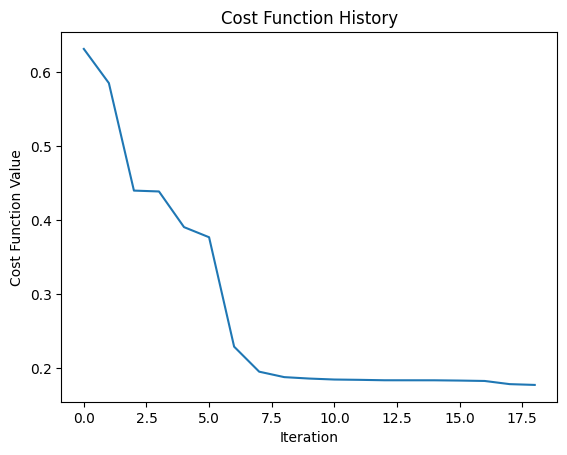

In [136]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function Value")
plt.title("Cost Function History")
plt.show()

### Evaluation

In [137]:
accuracy = accuracy_score(y_test, predictions >= 0.5) * 100.0
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 80.00%


## Testing

In [138]:
X_test_with_intercept = np.insert(X_test, 0, values=1, axis=1)
predictions = sigmoid(X_test_with_intercept @ theta_optimized)

### Confusion matrix

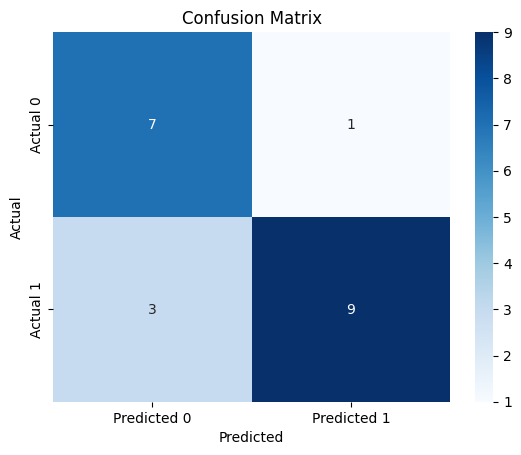

In [139]:
conf_matrix = confusion_matrix(y_test, predictions >= 0.5)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Decision boundary on the test set

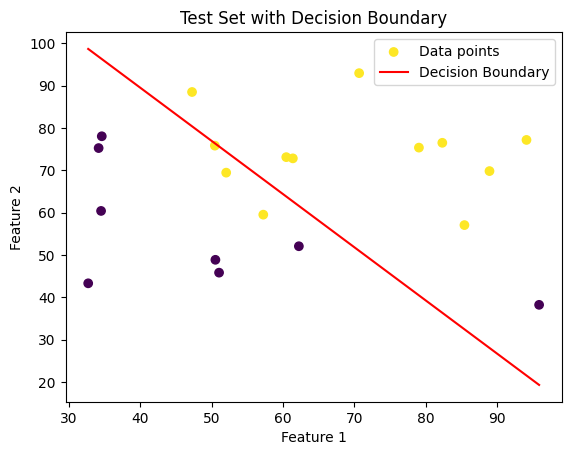

In [140]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap="viridis", label="Data points")
x1_values = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
x2_values = -(theta_optimized[0] + theta_optimized[1] * x1_values) / theta_optimized[2]
plt.plot(x1_values, x2_values, label="Decision Boundary", color="red")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Test Set with Decision Boundary")
plt.show()